In [2]:
! pip install darts

  Obtaining dependency information for darts from https://files.pythonhosted.org/packages/0b/29/3d09769040517fe39c2b16c3445a9d88d1290e88ba67a9a08a7071efafce/darts-0.26.0-py3-none-any.whl.metadata
  Using cached darts-0.26.0-py3-none-any.whl.metadata (48 kB)
  Obtaining dependency information for holidays>=0.11.1 from https://files.pythonhosted.org/packages/2c/d8/0a6ae9402b5809135026ae6e8aa7802ad613429ffe13cc2727822f33a6b4/holidays-0.35-py3-none-any.whl.metadata
  Using cached holidays-0.35-py3-none-any.whl.metadata (19 kB)
  Using cached nfoursid-1.0.1-py3-none-any.whl (16 kB)
  Obtaining dependency information for pmdarima>=1.8.0 from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached 

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [5]:
!aws s3 cp s3://sagemaker-us-east-2-694370953363/data_wrangler_flows/ . --recursive
#s3://sagemaker-us-east-2-694370953363/data_wrangler_flows/flow-05-23-49-02-106d966a.flow

download: s3://sagemaker-us-east-2-694370953363/data_wrangler_flows/flow-05-23-49-02-106d966a.flow to ./flow-05-23-49-02-106d966a.flow


In [8]:
!aws s3 cp s3://finaltrainingdata/ . --recursive

download: s3://finaltrainingdata/fire_training_data.csv to ./fire_training_data.csv


In [4]:
import pandas as pd
df = pd.read_csv("fire_training_data.csv")


In [5]:
df.drop(df.columns[0], axis=1, inplace=True)

In [6]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['month'] = df['acq_date'].dt.month
df

,longitude_x,latitude_x,acq_date,T2M_MIN,T2M_MAX,T2M,PRECTOTCORR,QV2M,WS10M,WD10M,WS10M_MAX,WS10M_MIN,brightness,confidence,bright_t31,type,is_hotspot,month
0,95.000,-6.5,2001-01-01,299.523438,300.945312,300.359375,0.000305,0.019104,5.125000,125.1875,7.476562,3.320312,0.0,0.0,0.0,0.0,0,1
1,95.000,-6.0,2001-01-01,299.476562,300.687500,300.132812,0.000183,0.018860,3.796875,129.1875,4.609375,2.781250,0.0,0.0,0.0,0.0,0,1
2,95.000,-5.5,2001-01-01,299.328125,300.351562,299.843750,0.000122,0.018494,2.570312,149.3750,3.781250,0.171875,0.0,0.0,0.0,0.0,0,1
3,95.000,-5.0,2001-01-01,298.804688,299.929688,299.507812,0.000061,0.018250,2.703125,173.6250,3.828125,1.539062,0.0,0.0,0.0,0.0,0,1
4,95.000,-4.5,2001-01-01,298.382812,299.507812,299.117188,0.000061,0.018127,2.843750,181.1875,4.468750,0.695312,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51143115,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12
51143116,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12
51143117,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12
51143118,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12


In [7]:
df['day'] = df['acq_date'].dt.dayofyear
df

,longitude_x,latitude_x,acq_date,T2M_MIN,T2M_MAX,T2M,PRECTOTCORR,QV2M,WS10M,WD10M,WS10M_MAX,WS10M_MIN,brightness,confidence,bright_t31,type,is_hotspot,month,day
0,95.000,-6.5,2001-01-01,299.523438,300.945312,300.359375,0.000305,0.019104,5.125000,125.1875,7.476562,3.320312,0.0,0.0,0.0,0.0,0,1,1
1,95.000,-6.0,2001-01-01,299.476562,300.687500,300.132812,0.000183,0.018860,3.796875,129.1875,4.609375,2.781250,0.0,0.0,0.0,0.0,0,1,1
2,95.000,-5.5,2001-01-01,299.328125,300.351562,299.843750,0.000122,0.018494,2.570312,149.3750,3.781250,0.171875,0.0,0.0,0.0,0.0,0,1,1
3,95.000,-5.0,2001-01-01,298.804688,299.929688,299.507812,0.000061,0.018250,2.703125,173.6250,3.828125,1.539062,0.0,0.0,0.0,0.0,0,1,1
4,95.000,-4.5,2001-01-01,298.382812,299.507812,299.117188,0.000061,0.018127,2.843750,181.1875,4.468750,0.695312,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51143115,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143116,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143117,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143118,106.875,7.0,2004-12-29,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364


In [8]:
df_heatmap = df.drop('acq_date', axis=1)
df_heatmap

,longitude_x,latitude_x,T2M_MIN,T2M_MAX,T2M,PRECTOTCORR,QV2M,WS10M,WD10M,WS10M_MAX,WS10M_MIN,brightness,confidence,bright_t31,type,is_hotspot,month,day
0,95.000,-6.5,299.523438,300.945312,300.359375,0.000305,0.019104,5.125000,125.1875,7.476562,3.320312,0.0,0.0,0.0,0.0,0,1,1
1,95.000,-6.0,299.476562,300.687500,300.132812,0.000183,0.018860,3.796875,129.1875,4.609375,2.781250,0.0,0.0,0.0,0.0,0,1,1
2,95.000,-5.5,299.328125,300.351562,299.843750,0.000122,0.018494,2.570312,149.3750,3.781250,0.171875,0.0,0.0,0.0,0.0,0,1,1
3,95.000,-5.0,298.804688,299.929688,299.507812,0.000061,0.018250,2.703125,173.6250,3.828125,1.539062,0.0,0.0,0.0,0.0,0,1,1
4,95.000,-4.5,298.382812,299.507812,299.117188,0.000061,0.018127,2.843750,181.1875,4.468750,0.695312,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51143115,106.875,7.0,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143116,106.875,7.0,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143117,106.875,7.0,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364
51143118,106.875,7.0,298.234375,298.515625,298.406250,0.000061,0.017273,10.195312,41.0000,11.015625,8.960938,0.0,0.0,0.0,0.0,0,12,364


Index([], dtype='object')


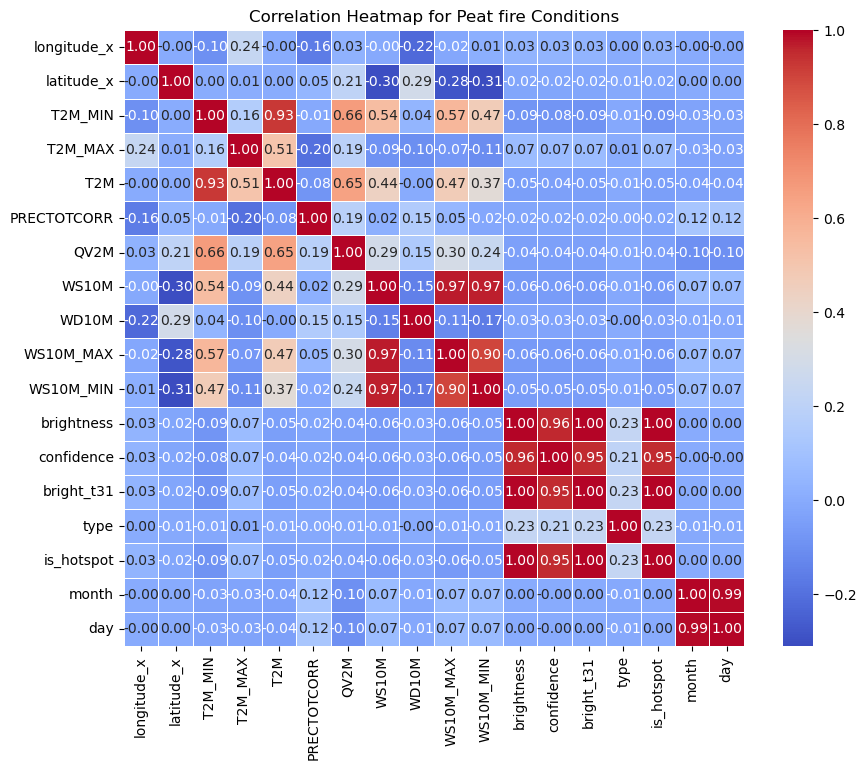

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Identify non-numeric columns
non_numeric_columns = df_heatmap.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

# Apply one-hot encoding to non-numeric columns
merged_df_encoded = pd.get_dummies(df_heatmap, columns=non_numeric_columns)

# Remove rows with NaN values
merged_df_encoded.dropna(inplace=True)


# Create a correlation matrix for the entire DataFrame
corr_matrix = merged_df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Peat fire Conditions")
# Get the current figure
fig = plt.gcf()

# Save the figure
fig.savefig('heatmap.jpg', dpi=300)  # Adjust dpi according to your needs

# If you want to show the plot as well, call plt.show() after saving the figure
plt.show()

In [10]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/15/95/951b51229a9c8af767e48b1f9ef7baa87279b1f5847d2f85de0855578e5d/catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl.metadata
  Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df_heatmap.to_csv("test_train.csv")

In [18]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Split the data into features (X) and target variable (y)
X = df_heatmap[['longitude_x', 'latitude_x', 'T2M_MIN', 'T2M_MAX', 'T2M', 'PRECTOTCORR', 'QV2M', 'WS10M', 'WD10M', 'WS10M_MAX', 'WS10M_MIN', 'month', 'day']]
y = df_heatmap['is_hotspot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier model
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)

# Train the model on the training data
model.fit(X_train, y_train, cat_features=[11, 12])  # Specify the indices of categorical features

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the model evaluation metrics
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


0:	learn: 0.4351950	total: 4.03s	remaining: 33m 32s
100:	learn: 0.0249902	total: 6m 1s	remaining: 23m 48s
200:	learn: 0.0241143	total: 12m 3s	remaining: 17m 56s
300:	learn: 0.0237961	total: 18m 3s	remaining: 11m 56s
400:	learn: 0.0235301	total: 24m 6s	remaining: 5m 57s
499:	learn: 0.0233518	total: 29m 53s	remaining: 0us
Accuracy: 0.9942462446561727
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00  10169581
           1       0.66      0.01      0.01     59043

    accuracy                           0.99  10228624
   macro avg       0.83      0.50      0.51  10228624
weighted avg       0.99      0.99      0.99  10228624



In [20]:
len(df_heatmap[df_heatmap['is_hotspot']==1])/len(df_heatmap[df_heatmap['is_hotspot']==0])

0.005803470242944539

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

# Create a CatBoost classifier model with class weights
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.3, loss_function='Logloss', auto_class_weights='Balanced')  # This tells CatBoost to balance the classes)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the model evaluation metrics
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC-ROC

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# Print the model evaluation metrics
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print(f'AUC-ROC: {roc_auc}')
print(f'PR AUC: {pr_auc}')
